# Capstone2 - 1 Data wrangling

## 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

C:\Users\JIYOON JUNG\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from ipywidgets import FileUpload
from IPython.display import display
import io
from PIL import Image

## 1.2 Load The 'Olist' E-Commerce Dataset

In [3]:
order_items = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_items_dataset.csv')
orders = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_orders_dataset.csv')
payments = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_payments_dataset.csv')
products = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_sellers_dataset.csv')
customers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_geolocation_dataset.csv')
reviews = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_reviews_dataset.csv')
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

## 1.3 Join the Data

The primary dataset is the "olist_orders_dataset," and the three databases are connected to it directly using the order_id. Additionally, the "olist_customer_dataset" is linked to the order dataset by using customer_id as the key. We'll examine the columns in each dataset and determine if we need them for this project.

In [4]:
uploader = FileUpload(accept=r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\db_relationship.JPG', multiple=False)
display(uploader)

FileUpload(value={}, accept='C:\\Users\\JIYOON JUNG\\Desktop\\Springboard\\Unit 15 Data Wrangling\\Capstone2\\…

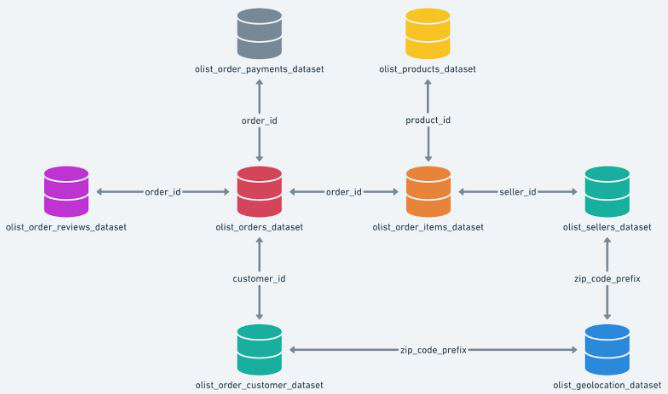

In [6]:
file_name = list(uploader.value.keys())[0]
image_binary_info = uploader.value[file_name]['content']
img_up = Image.open(io.BytesIO(image_binary_info))
img_up

In [7]:
# Merge the olist_orders_dataset with the olist_order_payments_dataset by using order_id
orders = pd.merge(orders, payments, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_reviews_dataset by using order_id
orders = pd.merge(orders, reviews, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_items_dataset by using order_id
orders = pd.merge(orders, order_items, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using customer_id
orders = pd.merge(orders, customers, how='left', on='customer_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using product_id
orders = pd.merge(orders, products, how='left', on='product_id')

# Merge the olist_orders_dataset with the olist_sellers_dataset by using seller_id
orders = pd.merge(orders, sellers, how='left', on='seller_id')

The geolocation dataset contains latitude, longitude, city, and state information corresponding to each zip code. After conducting the correlation analysis to present the geolocational representation of order data, we will decide whether we merge this table with the order data. 

In [8]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


## 1.4 Explore the Data

### 1.4.1 Basic Information

In [9]:
orders.shape

(119143, 39)

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   payment_sequential             119140 non-null  float64
 9   payment_type                   119140 non-null  object 
 10  payment_installments           119140 non-null  float64
 11  payment_value                  119140 non-null  float64
 12  review_id                     

### 1.4.2 Change the data

#### 1.4.2.1 Change the datatype

In [11]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_unique_

In [12]:
# Change the datatype to datetime64
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [13]:
orders['order_purchase_timestamp'].dtypes.name

'datetime64[ns]'

In [14]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['review_creation_date'] = pd.to_datetime(orders['review_creation_date'])
orders['review_answer_timestamp'] = pd.to_datetime(orders['review_answer_timestamp'])
orders['shipping_limit_date'] = pd.to_datetime(orders['shipping_limit_date'])

In [15]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                               

#### 1.4.2.2 Change the column names

In [16]:
orders = orders.rename(columns = {'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'})

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   payment_sequential             119140 non-null  float64       
 9   payment_type                   119140 non-null  object        
 10  payment_installments           119140 non-null  float64       
 11  

#### 1.4.2.3 Translate the product category name

In [18]:
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

In [19]:
translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
orders = pd.merge(orders, translation, how ='left', on = 'product_category_name')

In [21]:
orders[orders['product_category_name_english'].isnull() == True].product_category_name.unique()

array([nan, 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [22]:
orders.loc[orders['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen_laptops_and_food_preparators'
orders.loc[orders['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
orders.loc[orders['product_category_name'].isna(), 'product_category_name_english'] = 'N/A'

In [23]:
orders[orders['product_category_name_english'].isnull() == True].product_category_name.unique()

array([], dtype=object)

In [24]:
orders.loc[orders['product_category_name_english'] == 'N/A'].shape

(2542, 40)

In [25]:
orders = orders.drop(columns = ['product_category_name'])

In [26]:
orders.shape

(119143, 39)

### 1.4.3 Missing data

In [27]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                                count          %
review_comment_title           105154  88.258647
review_comment_message          68898  57.827988
order_delivered_customer_date    3421   2.871339
product_photos_qty               2542   2.133571
product_description_length       2542   2.133571
product_name_length              2542   2.133571
order_delivered_carrier_date     2086   1.750837
review_id                         997   0.836810
review_creation_date              997   0.836810
review_score                      997   0.836810
review_answer_timestamp           997   0.836810
product_weight_g                  853   0.715946
product_length_cm                 853   0.715946
product_height_cm                 853   0.715946
product_width_cm                  853   0.715946
seller_id                         833   0.699160
shipping_limit_date               833   0.699160
seller_state                      833   0.699160
freight_value                     833   0.699160
price               

#### 1.4.3.1 review_comment_title and reveiw_comment_message

* 105154 review_comment_title, 68898 review_comment_message values missing

In [28]:
# Explore the 'review_comment_title' and 'reveiw_comment_message' columns.

review_comment_eg = orders[(orders['review_comment_title'].notnull()) & (orders['review_comment_message'].notnull())]
selected_columns = review_comment_eg[['review_score','review_comment_title', 'review_comment_message']]
selected_columns.head()

,review_score,review_comment_title,review_comment_message
3,4.0,Muito boa a loja,Muito bom o produto.
19,5.0,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...
30,5.0,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns
32,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...
33,1.0,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...


In [29]:
orders = orders.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [30]:
orders.shape

(119143, 37)

### 1.4.4 Order status (chronological orders)

① created 
→
② invoiced 
→
③ approved
→
④ processing
→
⑤-a.shipped
⑤-b.unavailable
→
⑥ delivered

* Cancellation takes place in any stage. 

In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [32]:
# Check the number of rows with each unique value of variable
df = orders['order_status'].value_counts().to_frame('counts').sort_values('counts', ascending = False).join(
    orders['order_status'].value_counts(dropna=False, normalize=True).to_frame('%'))
df

,counts,%
delivered,115723,0.971295
shipped,1256,0.010542
canceled,750,0.006295
unavailable,652,0.005472
invoiced,378,0.003173
processing,376,0.003156
created,5,0.000042
approved,3,0.000025


In [33]:
# Check at which stage of order the 'invoiced' takes place.
orders[orders['order_status'] == 'invoiced'][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()

order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     378
order_delivered_customer_date    378
dtype: int64

In [34]:
# Check at which stage of order the 'processing' takes place.
orders[orders['order_status'] == 'processing'][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()

order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     376
order_delivered_customer_date    376
dtype: int64

In [35]:
# Count the non-NA values of 'order_approved_at','order_delivered_carrier_date' ,'order_delivered_customer_date,' and 'order_delivered_customer_date' to see at which stage of order the cancellation takes places.
cancel_acc = orders[(orders['order_status'] == "canceled")][['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()
cancel_acc

order_purchase_timestamp           0
order_approved_at                157
order_delivered_carrier_date     670
order_delivered_customer_date    743
dtype: int64

In [36]:
before_approval= cancel_acc['order_approved_at']
before_carrier_pickup = cancel_acc['order_delivered_carrier_date'] - cancel_acc['order_approved_at']
before_customer_delivery = cancel_acc['order_delivered_customer_date'] - cancel_acc['order_delivered_carrier_date']
after_customer_delivery = len(orders[(orders['order_status'] == "canceled")&(orders['order_delivered_customer_date'].notnull())])

In [37]:
df = pd.Series({'before_approval': before_approval
    ,'before_carrier_pickup' : before_carrier_pickup
    ,'before_customer_delivery' : before_customer_delivery
    ,'after_customer_delivery' : after_customer_delivery})
df

before_approval             157
before_carrier_pickup       513
before_customer_delivery     73
after_customer_delivery       7
dtype: int64

Order cancellation takes place at any stage of the order. However, more than 60% of cancellations take place before carrier pickup.

### 1.4.5 Categorial Features

In [38]:
df = pd.Series(orders.select_dtypes('object').columns.T)
df

0                          order_id
1                       customer_id
2                      order_status
3                      payment_type
4                         review_id
5                        product_id
6                         seller_id
7                customer_unique_id
8                     customer_city
9                    customer_state
10                      seller_city
11                     seller_state
12    product_category_name_english
dtype: object

#### 1.4.5.1 order_Id

In [39]:
orders['order_id'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
fedcd9f7ccdc8cba3a18defedd1a5547    38
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
c6492b842ac190db807c15aff21a7dd6    24
                                    ..
3cd800ca7c2571661a5d8f0fe9053536     1
f98dc0bb1b5d1102af20837256cca2c5     1
63e2061a4407562cd451960ffcddf631     1
3e6e1b157030813612778573761473cd     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 99441, dtype: int64

The dataset shows that the order ID '895ab968e7bb0d5659d16cd74cd1650c' appears 63 times. We need to investigate if there are any other fields that might be causing duplicates. If the value counts are not an accurate way to count the number of orders, we should make necessary adjustments or create additional fields that indicate the number of orders and products.

In [40]:
(orders['order_id']+','+orders['product_id']).value_counts().head()

895ab968e7bb0d5659d16cd74cd1650c,ebf9bc6cd600eadd681384e3116fda85    42
fedcd9f7ccdc8cba3a18defedd1a5547,0554911df28fda9fd668ce5ba5949695    38
fa65dad1b0e818e3ccc5cb0e39231352,1aecdb5fa3add74e385f25c6c527a462    29
ccf804e764ed5650cd8759557269dc13,8d37ee446981d3790967d0268d6cfc81    26
465c2e1bee4561cb39e0db8c5993aafc,11250b0d4b709fee92441c5f34122aed    24
dtype: int64

In [41]:
orders[(orders['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c') & (orders['product_id'] == 'ebf9bc6cd600eadd681384e3116fda85')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
85508,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,17.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85509,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,17.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85511,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,1.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85512,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,1.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85514,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,13.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85515,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,13.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85517,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,16.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85518,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,16.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85520,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,19.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table
85521,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,19.0,voucher,...,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,bed_bath_table


In [42]:
# The payment sequentials seem to cause duplicates.
orders[(orders['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c') & (orders['product_id'] == 'ebf9bc6cd600eadd681384e3116fda85')].sort_values('payment_sequential').T

,85511,85512,85530,85529,85545,85544,85523,85524,85548,85547,...,85508,85509,85536,85535,85520,85521,85559,85560,85527,85526
order_id,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,...,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c
customer_id,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,...,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,...,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31
order_approved_at,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,...,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31
order_delivered_carrier_date,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,...,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14
order_delivered_customer_date,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,...,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18
order_estimated_delivery_date,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,...,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00
payment_sequential,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,5.0,...,17.0,17.0,18.0,18.0,19.0,19.0,20.0,20.0,21.0,21.0
payment_type,voucher,voucher,voucher,voucher

In [43]:
# Check the number of products that were ordered for the order with ID 895ab968e7bb0d5659d16cd74cd1650c.
order_items[order_items['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
60265,895ab968e7bb0d5659d16cd74cd1650c,1,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21
60266,895ab968e7bb0d5659d16cd74cd1650c,2,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21
60267,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12


In [44]:
# Drop columns from 'payments' dataset, which causes duplicate values.
orders = orders.drop(['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], axis=1).drop_duplicates()

In [45]:
orders.shape

(114092, 33)

In [46]:
(orders['order_id']+','+orders['product_id']).value_counts().head()

ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4    20
1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3    20
9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d    15
428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8    15
9bdc4d4c71aa1de4606060929dee888c,44a5d24dd383324a421569ca697b13c2    14
dtype: int64

In [47]:
orders[orders['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8'].T

,112579,112580,112581,112582,112583,112584,112585,112586,112587,112588,112589,112590,112591,112592,112593,112594,112595,112596,112597,112598
order_id,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8,ab14fdcfbe524636d65ee38360e22ce8
customer_id,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be,bd5d39761aa56689a265d95d8d32b8be
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34,2017-08-23 09:22:34
order_approved_at,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23,2017-08-24 14:30:23
order_delivered_carrier_date,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36,2017-08-25 20:07:36
order_delivered_customer_date,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03,2017-09-02 12:13:03
order_estimated_delivery_date,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00,2017-09-21 00:00:00
review_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [48]:
orders[orders['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c'].T

,85508,85509,85510
order_id,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c,895ab968e7bb0d5659d16cd74cd1650c
customer_id,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83,270c23a11d024a44c896d1894b261a83
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-08-08 20:26:31,2017-08-08 20:26:31,2017-08-08 20:26:31
order_approved_at,2017-08-08 20:43:31,2017-08-08 20:43:31,2017-08-08 20:43:31
order_delivered_carrier_date,2017-08-10 11:58:14,2017-08-10 11:58:14,2017-08-10 11:58:14
order_delivered_customer_date,2017-08-14 12:46:18,2017-08-14 12:46:18,2017-08-14 12:46:18
order_estimated_delivery_date,2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-30 00:00:00
review_id,eef5dbca8d37dfce6db7d7b16dd0525e,eef5dbca8d37dfce6db7d7b16dd0525e,eef5dbca8d37dfce6db7d7b16dd0525e
review_score,5.0,5.0,5.0


The order size is the maximum order_item_id, but the number and size of different products in each order are not indicated in any columns. After deleting unnecessary information, new columns will be created to display the order-product size.

In [49]:
len(orders)

114092

In [50]:
orders = orders.drop_duplicates().reset_index().drop(['index'], axis = 1)

In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   review_id                      113131 non-null  object        
 9   review_score                   113131 non-null  float64       
 10  review_creation_date           113131 non-null  datetime64[ns]
 11  

#### 1.4.5.2 'review_id', 'review_score', 'review_score', 'review_creation_date', 'review_answer_timestamp' columns

In [52]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                               count         %
order_delivered_customer_date   3253  2.851208
product_name_length             2390  2.094801
product_photos_qty              2390  2.094801
product_description_length      2390  2.094801
order_delivered_carrier_date    1980  1.735442
review_id                        961  0.842303
review_creation_date             961  0.842303
review_score                     961  0.842303
review_answer_timestamp          961  0.842303
product_width_cm                 796  0.697683
product_height_cm                796  0.697683
product_length_cm                796  0.697683
product_weight_g                 796  0.697683
seller_zip_code_prefix           778  0.681906
seller_city                      778  0.681906
order_item_id                    778  0.681906
product_id                       778  0.681906
seller_id                        778  0.681906
shipping_limit_date              778  0.681906
freight_value                    778  0.681906
seller_state 

In [53]:
# Delete all columns related to reviews to remove duplicates.
orders = orders.drop(columns = ['review_id', 'review_score', 'review_score', 'review_creation_date', 'review_answer_timestamp']).drop_duplicates()

#### 1.4.5.3 Create 'order_size' and 'product_order_size' columns

In [54]:
orders['order_size'] = orders.groupby('order_id')['order_id'].transform('count')

In [55]:
# Verify the total number of items in the order'ab14fdcfbe524636d65ee38360e22ce8', which is 20.
orders[orders['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8'].order_size

107823    20
107824    20
107825    20
107826    20
107827    20
107828    20
107829    20
107830    20
107831    20
107832    20
107833    20
107834    20
107835    20
107836    20
107837    20
107838    20
107839    20
107840    20
107841    20
107842    20
Name: order_size, dtype: int64

In [56]:
orders['product_order_size']= orders.groupby(['order_id','product_id'])['product_id'].transform('count')

In [57]:
orders[orders['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_size,product_order_size
101814,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,1.0,270516a3f41dc035aa87d220228f844c,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101815,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101816,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,3.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101817,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,4.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101818,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,5.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101819,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,6.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101820,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,7.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101821,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,8.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101822,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,9.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0
101823,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,10.0,05b515fdc76e888aada3c6d66c201dff,...,800.0,21.0,4.0,15.0,3813.0,sao paulo,SP,health_beauty,21,10.0


In [58]:
# drop the 'order_item_id' field and drop duplicates values.
orders = orders.drop(columns = ['order_item_id']).drop_duplicates()

In [59]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103200 entries, 0 to 114091
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103200 non-null  object        
 1   customer_id                    103200 non-null  object        
 2   order_status                   103200 non-null  object        
 3   order_purchase_timestamp       103200 non-null  datetime64[ns]
 4   order_approved_at              103040 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101398 non-null  datetime64[ns]
 6   order_delivered_customer_date  100195 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103200 non-null  datetime64[ns]
 8   product_id                     102425 non-null  object        
 9   seller_id                      102425 non-null  object        
 10  shipping_limit_date            102425 non-null  datetime64[ns]
 11  

In [60]:
orders['order_id'].nunique()

99441

In [61]:
# Check the order_size distribution.
order_counts = pd.DataFrame(orders[['order_id','order_size']].drop_duplicates()['order_size'].value_counts())
print(order_counts.sum())
order_percentage = (order_counts / order_counts.sum()) * 100
order_summary = pd.concat([order_counts, order_percentage], axis=1).reset_index()
order_summary.columns = ['order_size', 'count', 'percentage']
order_summary = order_summary.sort_values(by = 'order_size').reset_index().drop(['index'], axis = 1)
order_summary

order_size    99441
dtype: int64


,order_size,count,percentage
0,1,89638,90.141893
1,2,7516,7.558251
2,3,1322,1.329432
3,4,505,0.507839
4,5,204,0.205147
5,6,198,0.199113
6,7,22,0.022124
7,8,8,0.008045
8,9,3,0.003017
9,10,8,0.008045


In [62]:
weighted_mean = (order_summary['order_size'] * order_summary['count']).sum() / order_summary['count'].sum()
print("Average_order_size:", round(weighted_mean,2))

Average_order_size: 1.14


About 90% of orders have only one item and the average order size for Olist Brazilian E-commerce is 1.14.

In [63]:
orders['Year'] = orders['order_purchase_timestamp'].dt.year
orders['Month'] = orders['order_purchase_timestamp'].dt.month

In [64]:
order_counts_2 = pd.DataFrame(orders[['Year', 'Month','order_id','order_size']].drop_duplicates()[['Year', 'Month','order_size']].value_counts())
order_counts_2 = order_counts_2.sort_values(by = ['Year', 'Month', 'order_size']).reset_index()
order_counts_2.columns = ['Year', 'Month', 'order_size', 'counts']
order_counts_2

,Year,Month,order_size,counts
0,2016,9,1,2
1,2016,9,2,1
2,2016,9,3,1
3,2016,10,1,290
4,2016,10,2,24
...,...,...,...,...
169,2018,8,6,13
170,2018,8,7,1
171,2018,8,10,1
172,2018,9,1,16


In [65]:
# Calculate the weighted mean within each 'Year' and 'Month' group without using apply or lambda
weighted_mean = (order_counts_2['order_size'] * order_counts_2['counts']).groupby([order_counts_2['Year'], order_counts_2['Month']]).sum() / order_counts_2['counts'].groupby([order_counts_2['Year'], order_counts_2['Month']]).sum()

# Round the calculated weighted mean to 2 decimal places
weighted_mean = pd.DataFrame(weighted_mean.round(2))
weighted_mean

0
Year Month      
2016 9      1.75
     10     1.17
     12     1.00
2017 1      1.21
     2      1.12
     3      1.13
     4      1.12
     5      1.13
     6      1.11
     7      1.14
     8      1.14
     9      1.14
     10     1.16
     11     1.16
     12     1.12
2018 1      1.14
     2      1.15
     3      1.14
     4      1.15
     5      1.16
     6      1.15
     7      1.13
     8      1.12
     9      1.00
     10     1.00

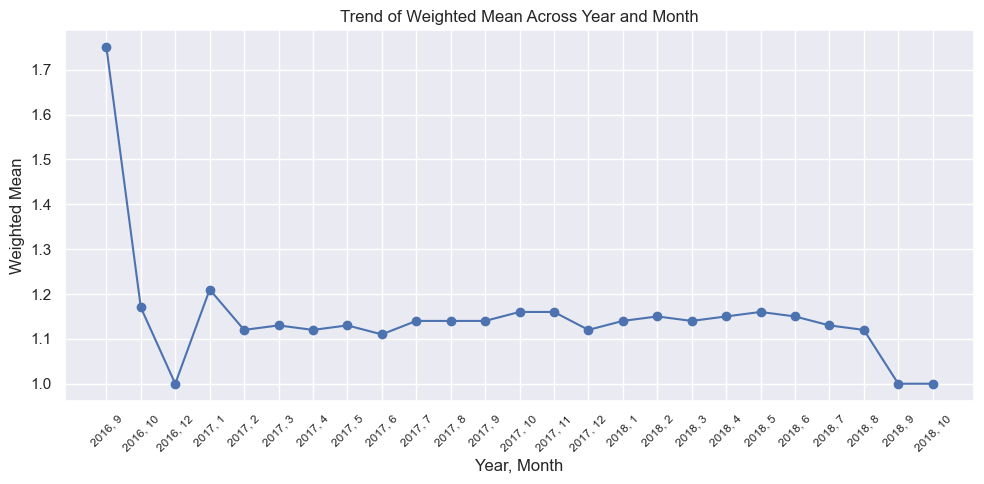

In [66]:
# Combine 'Year' and 'Month' into a single variable for x-axis
x_values = weighted_mean.index.get_level_values('Year').astype(str) + ', ' + weighted_mean.index.get_level_values('Month').astype(str)

# Plotting the trend of weighted mean values
plt.figure(figsize=(10, 5))
plt.plot(x_values, weighted_mean.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year, Month')
plt.ylabel('Weighted Mean')
plt.title('Trend of Weighted Mean Across Year and Month')
plt.xticks(rotation=45, fontsize = 8.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
orders.shape

(103200, 32)

#### 1.4.5.4 product_id & product_category_name

In [68]:
# display the product sales by month (Units: Qty)
product_sales_by_month =orders.groupby(['Year', 'Month','product_category_name_english'])['product_order_size'].sum().groupby(['Year', 'Month', 'product_category_name_english']).sum().reset_index(name = 'sales')

product_sales_by_month['total_sales'] = product_sales_by_month.groupby(['Year', 'Month'])['sales'].transform('sum')
product_sales_by_month['sales_percentage'] = round((product_sales_by_month['sales'] / product_sales_by_month['total_sales']) * 100, 2)

product_sales_by_month

,Year,Month,product_category_name_english,sales,total_sales,sales_percentage
0,2016,9,N/A,0.0,6.0,0.00
1,2016,9,furniture_decor,2.0,6.0,33.33
2,2016,9,health_beauty,3.0,6.0,50.00
3,2016,9,telephony,1.0,6.0,16.67
4,2016,10,N/A,2.0,363.0,0.55
...,...,...,...,...,...,...
1281,2018,8,toys,170.0,7248.0,2.35
1282,2018,8,watches_gifts,416.0,7248.0,5.74
1283,2018,9,N/A,0.0,1.0,0.00
1284,2018,9,kitchen_dining_laundry_garden_furniture,1.0,1.0,100.00


In [69]:
# validate the data with the order file.
orders[(orders['Year'] == 2018) & 
       (orders['Month'] == 8) &
       (orders['product_category_name_english'] =='watches_gifts')]['product_order_size'].sum()

416.0

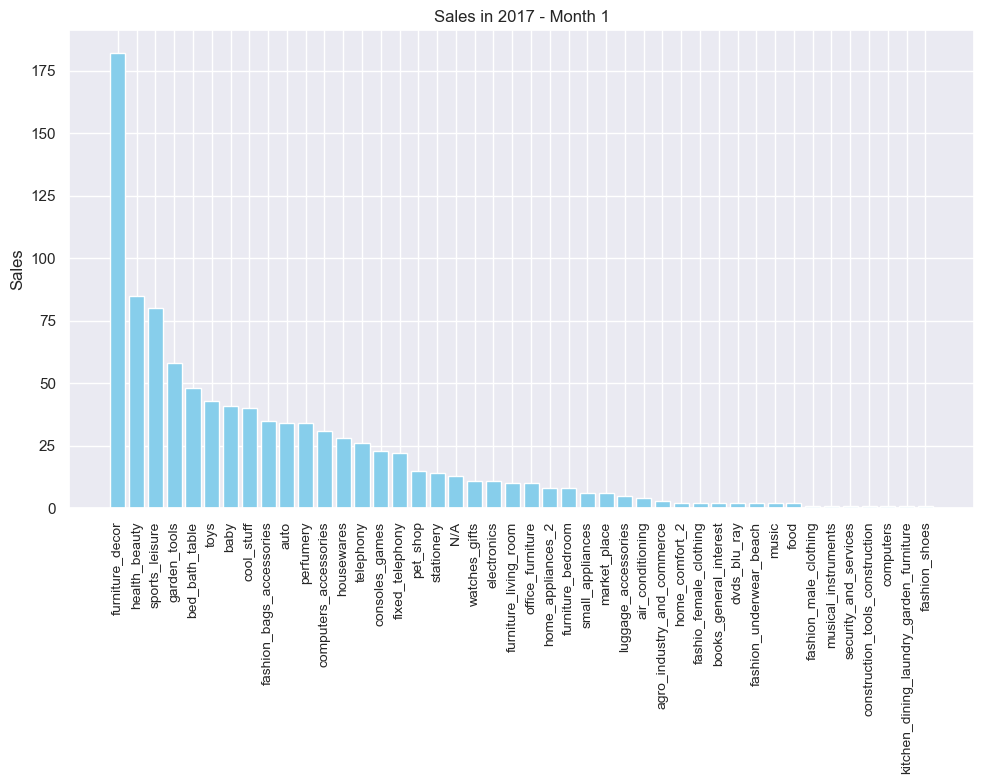

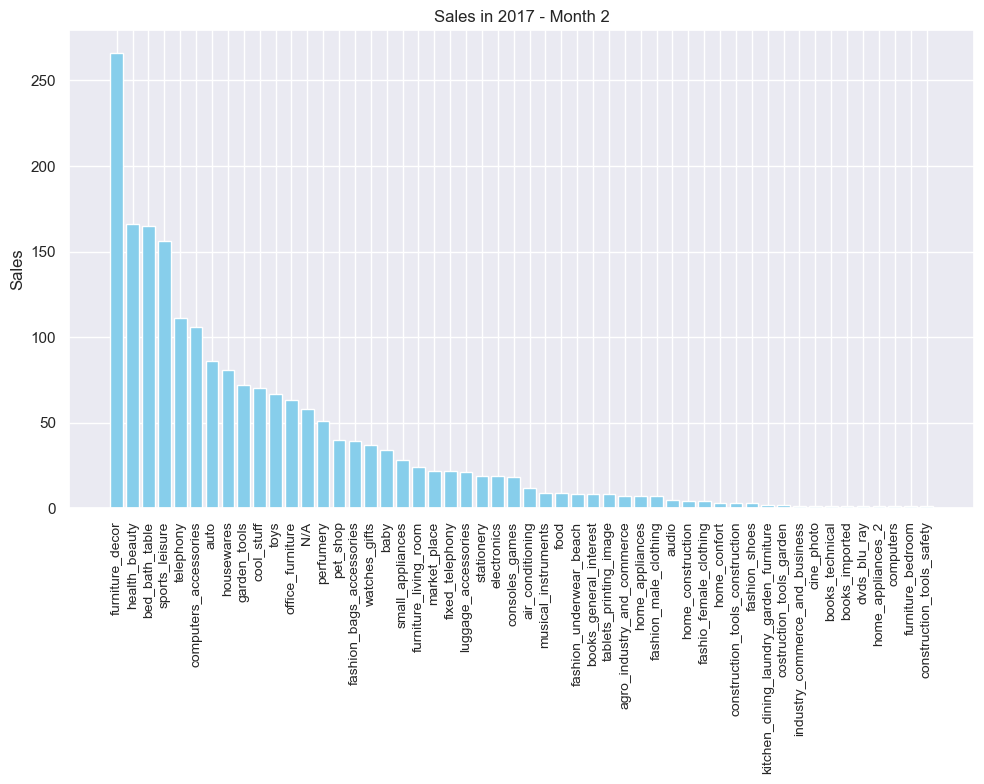

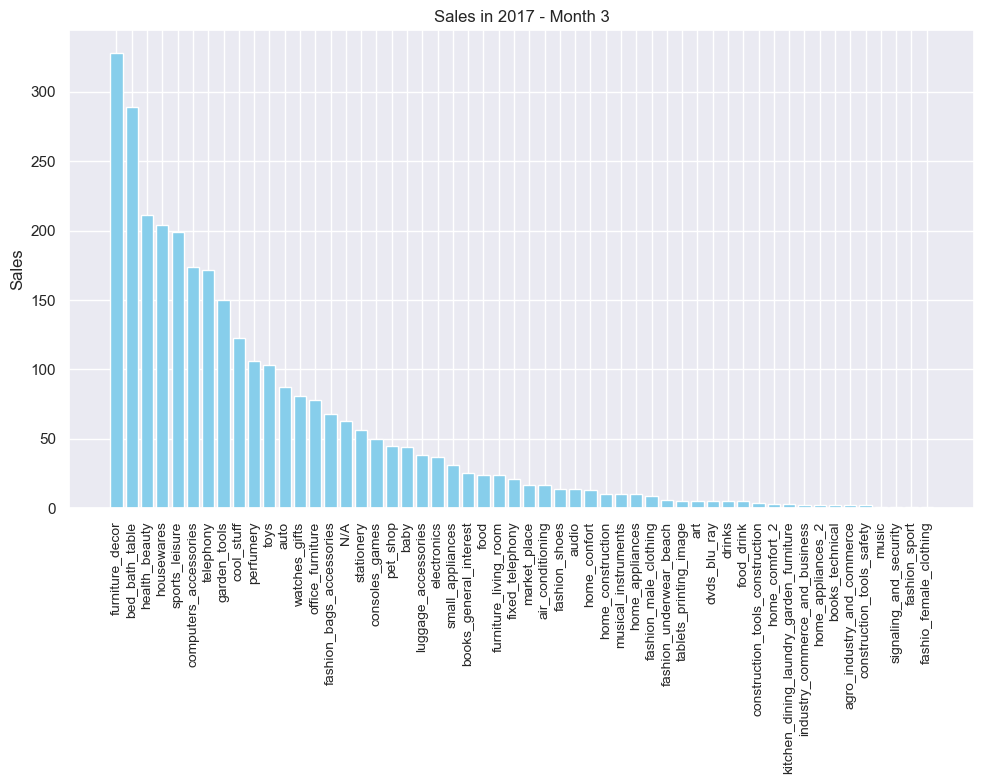

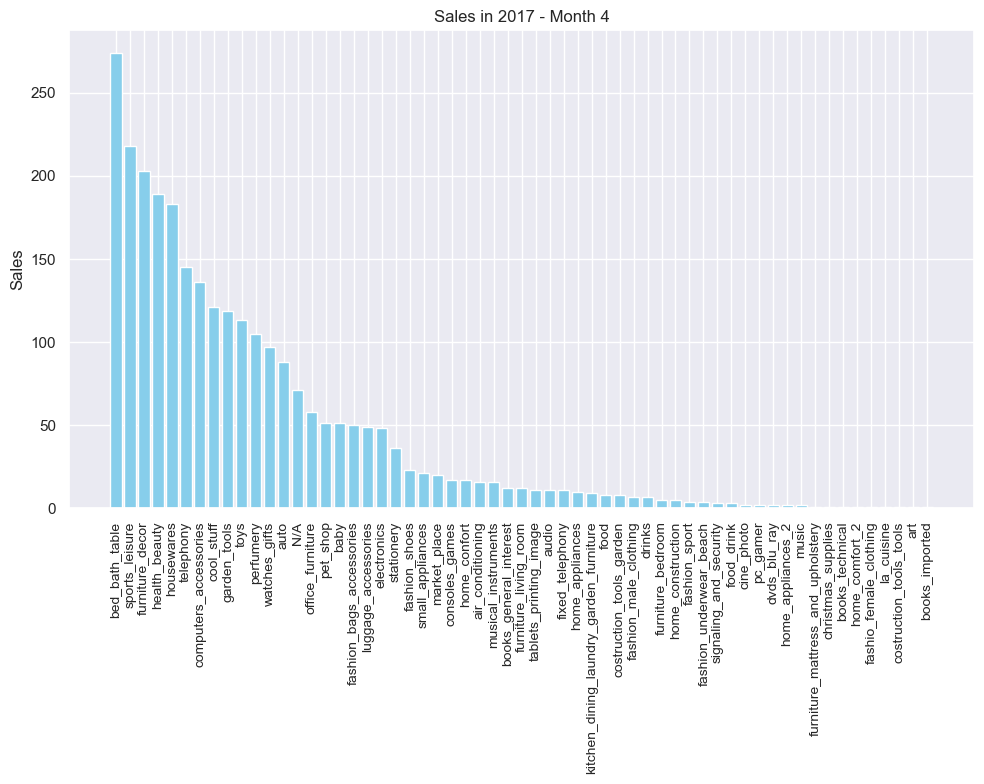

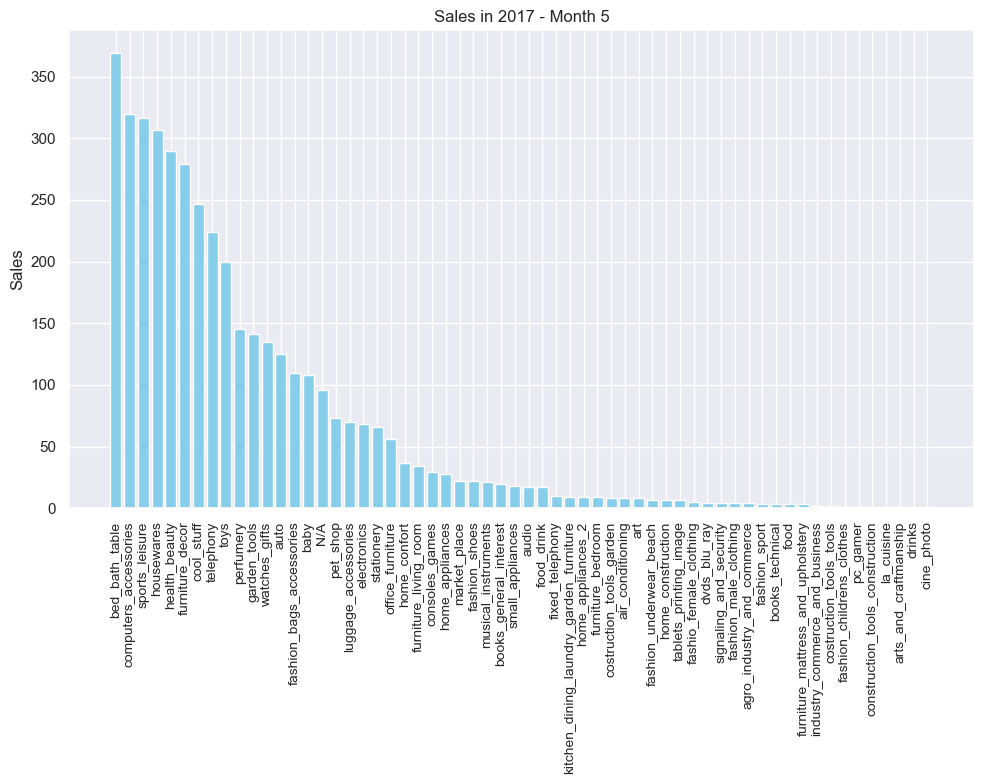

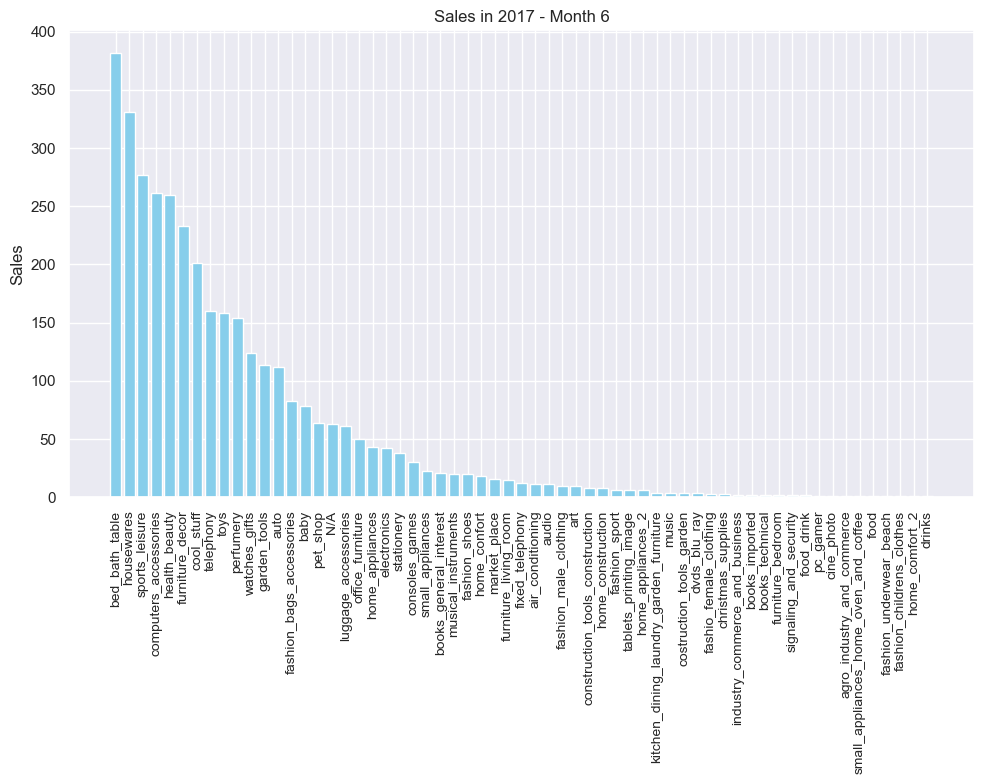

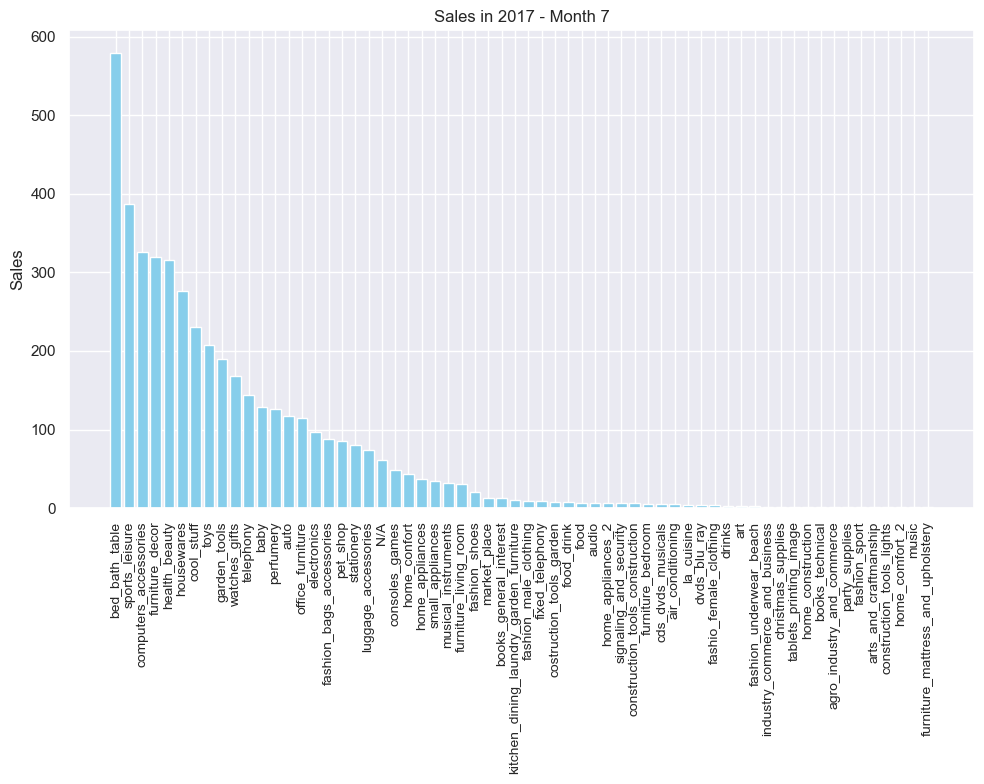

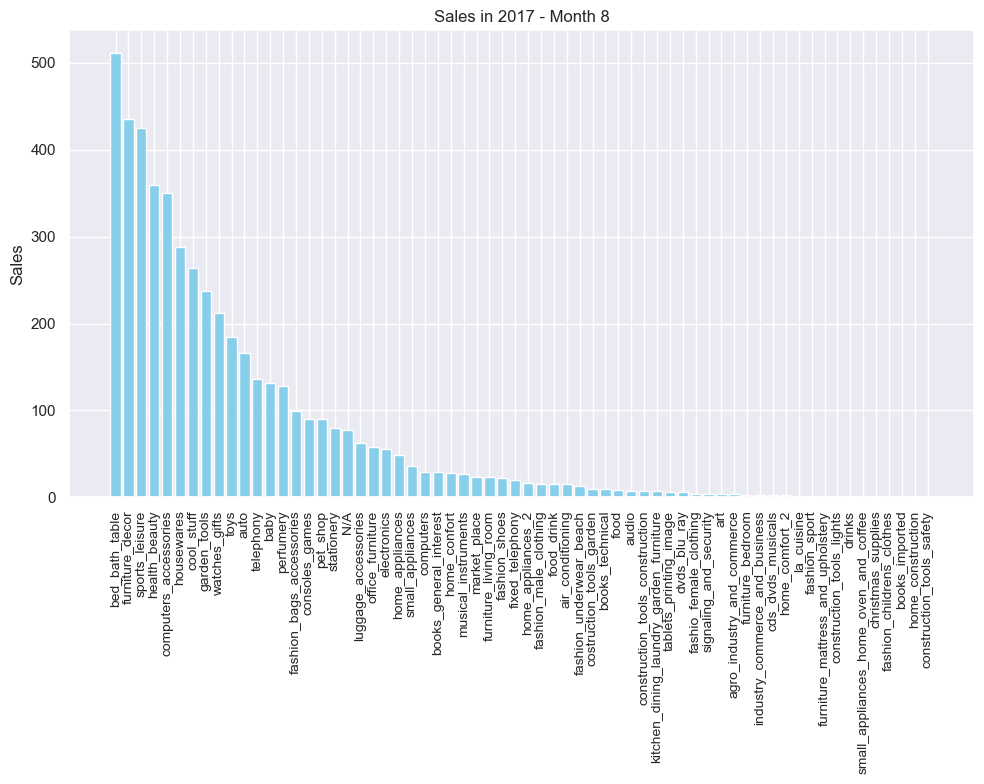

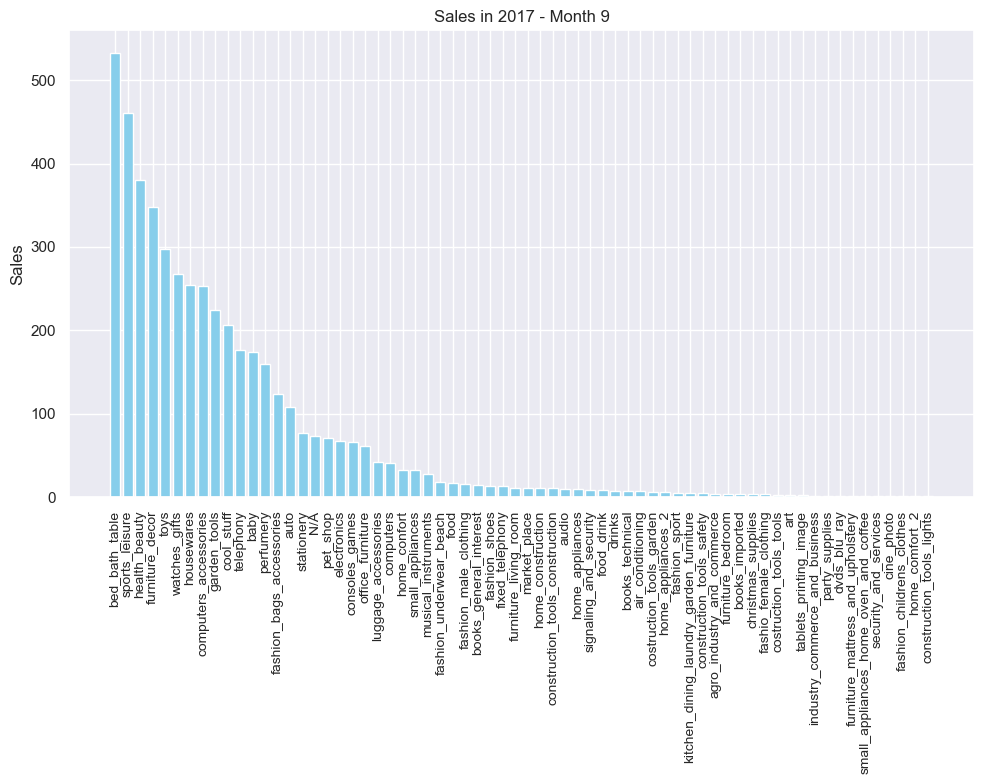

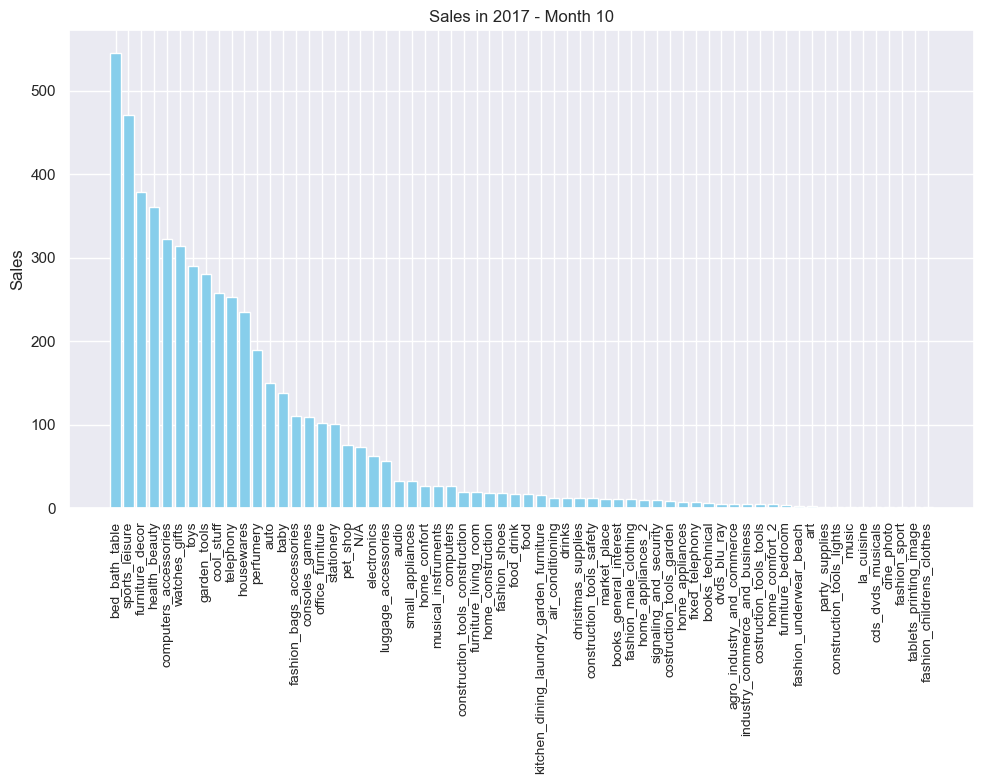

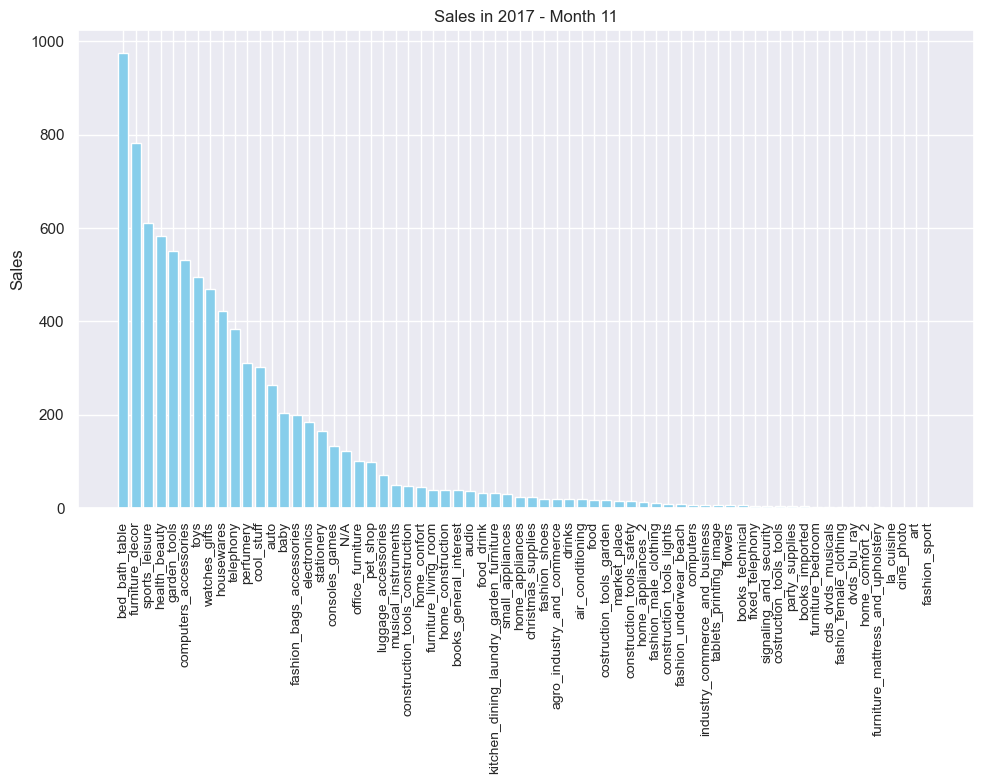

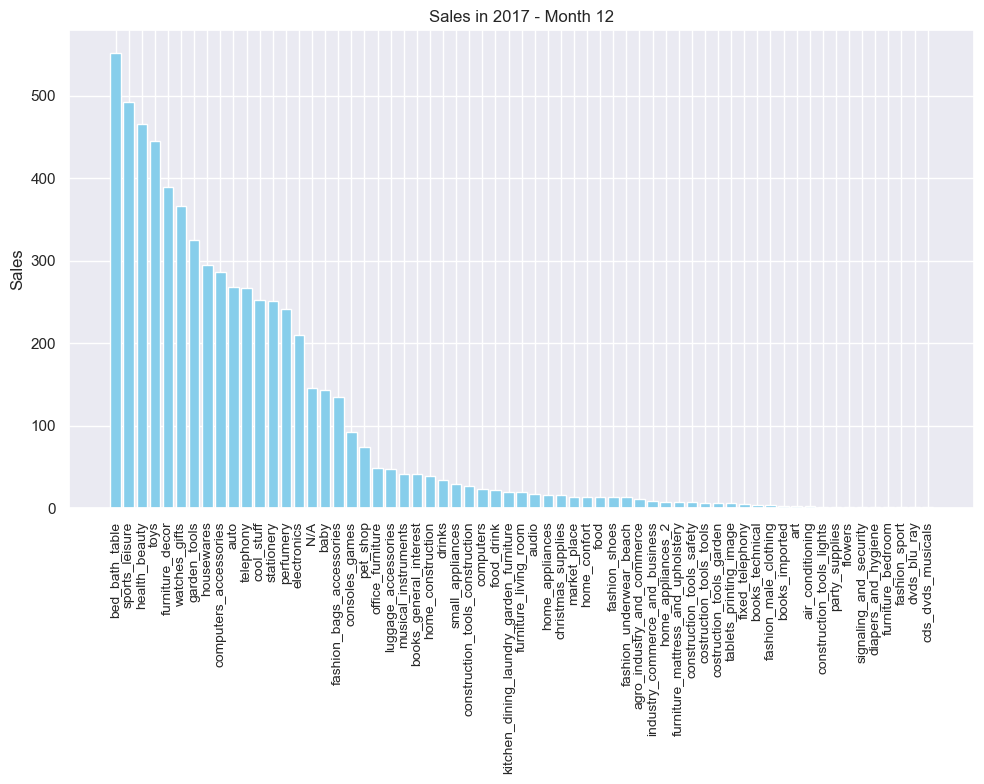

In [70]:
for month in range(1, 13):
    
    dt = product_sales_by_month[
        (product_sales_by_month['Year'] == 2017) &
        (product_sales_by_month['Month'] == month)
    ]
    
    # Sort the categories by sales within each month
    dt_sorted = dt.sort_values(by='sales', ascending=False)
    categories = dt_sorted['product_category_name_english'].values
    values = dt_sorted['sales'].values
    
    # Creating the bar chart
    plt.figure(figsize=(10, 8))
    plt.bar(categories, values, color='skyblue')
    plt.ylabel('Sales', fontsize=12)
    plt.title(f'Sales in 2017 - Month {month}')
    plt.xticks(rotation=90, fontsize=10) 
    plt.tight_layout()
    plt.show()

### 2.6 Numeric Data Features

In [71]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
price,102425.0,124.422006,188.926084,0.85,40.00,78.80,139.00,6735.00
freight_value,102425.0,20.111152,15.884700,0.00,13.14,16.32,21.22,409.68
customer_zip_code_prefix,103200.0,35083.653207,29792.249469,1003.00,11320.00,24358.00,58736.25,99990.00
product_name_length,100965.0,48.874868,9.997415,5.00,43.00,52.00,57.00,76.00
product_description_length,100965.0,787.263804,650.586810,4.00,348.00,603.00,987.00,3992.00
product_photos_qty,100965.0,2.239915,1.743415,1.00,1.00,2.00,3.00,20.00
product_weight_g,102409.0,2090.916472,3750.962163,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,102409.0,30.085285,16.097482,7.00,18.00,25.00,38.00,105.00
product_height_cm,102409.0,16.409222,13.310745,2.00,8.00,13.00,20.00,105.00
product_width_cm,102409.0,23.039528,11.747033,6.00,15.00,20.00,30.00,118.00


In [72]:
orders[orders['price'].isna()]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

Order status:
① created → ② invoiced → ③ approved → ④ processing → ⑤-a.shipped ⑤-b.unavailable → ⑥ delivered

Order_ids with one 'unavailable,' 'canceled,' 'created,' 'shipped,' and 'invoiced' order statuses have no price values.

In [73]:
orders = orders.dropna(subset=['price'])

In [74]:
orders = orders.drop(columns = ['product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 
                      'product_height_cm', 'product_width_cm'])

In [75]:
orders = orders.drop_duplicates()

In [76]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 114091
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102425 non-null  object        
 1   customer_id                    102425 non-null  object        
 2   order_status                   102425 non-null  object        
 3   order_purchase_timestamp       102425 non-null  datetime64[ns]
 4   order_approved_at              102411 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101397 non-null  datetime64[ns]
 6   order_delivered_customer_date  100195 non-null  datetime64[ns]
 7   order_estimated_delivery_date  102425 non-null  datetime64[ns]
 8   product_id                     102425 non-null  object        
 9   seller_id                      102425 non-null  object        
 10  shipping_limit_date            102425 non-null  datetime64[ns]
 11  

In [77]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_size,product_order_size,Year,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,sao paulo,SP,9350.0,maua,SP,housewares,1,1.0,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,barreiras,BA,31570.0,belo horizonte,SP,perfumery,1,1.0,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,vianopolis,GO,14840.0,guariba,SP,auto,1,1.0,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,...,sao goncalo do amarante,RN,31842.0,belo horizonte,MG,pet_shop,1,1.0,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,...,santo andre,SP,8752.0,mogi das cruzes,SP,stationery,1,1.0,2018,2


In [78]:
# Check if the 'price' column represents the individual unit price of each item or the total sales amount for the product_id.
orders[orders['order_size']!=1][['order_id', 'product_id', 'price', 'order_size', 'product_order_size']].groupby('order_id').head()

,order_id,product_id,price,order_size,product_order_size
10,e6ce16cb79ec1d90b1da9085a6118aeb,08574b074924071f4e201e151b152b4e,99.00,2,2.0
27,acce194856392f074dbf9dada14d8d82,d70f38e7f79c630f8ea00c993897042c,90.90,2,1.0
28,acce194856392f074dbf9dada14d8d82,9451e630d725c4bb7a5a206b48b99486,39.50,2,1.0
54,9faeb9b2746b9d7526aef5acb08e2aa0,f48eb5c2fde13ca63664f0bb05f55346,60.00,2,2.0
60,66e4624ae69e7dc89bd50222b59f581f,b37b72d5a56f887725c2862184b8cab8,22.99,2,2.0
...,...,...,...,...,...
114043,b3112ca67f3afd4e20cf2ee91fc4f804,4f18ca9862f511ecba98258b2194d061,95.00,2,2.0
114062,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,356.00,2,2.0
114082,9115830be804184b91f5c00f6f49f92d,c982dbea53b864f4d27c1d36f14b6053,42.11,2,1.0
114083,9115830be804184b91f5c00f6f49f92d,49d2e2460386273b195e7e59b43587c3,26.90,2,1.0


In [79]:
orders[orders['product_id'] == 'f48eb5c2fde13ca63664f0bb05f55346'][['order_id', 'product_id', 'price', 'order_size', 'product_order_size']]

,order_id,product_id,price,order_size,product_order_size
54,9faeb9b2746b9d7526aef5acb08e2aa0,f48eb5c2fde13ca63664f0bb05f55346,60.0,2,2.0
5833,c7cfea0c153e6382e32e84c2a9dd7d2e,f48eb5c2fde13ca63664f0bb05f55346,60.0,1,1.0
62058,64e5cb1dfa641be49d6baa62b8f41b9c,f48eb5c2fde13ca63664f0bb05f55346,60.0,3,1.0
68309,f577c78346131418552c3d7fea582723,f48eb5c2fde13ca63664f0bb05f55346,60.0,2,1.0
96341,0f1dea9ac2c2be3ef6885442dab7ef0e,f48eb5c2fde13ca63664f0bb05f55346,60.0,1,1.0


After examining the price columns in the table, it can be concluded that the 'price' column indicates the unit price for each product with the product_id 'f48eb5c2fde13ca63664f0bb05f55346' always being priced at $60.

In [80]:
orders['product_sales_amt'] = orders['price']*orders['product_order_size']
orders['order_sales_amt'] = orders.groupby('order_id')['product_sales_amt'].transform('sum')

In [81]:
orders[orders['order_size'] != 1].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_size,product_order_size,Year,Month,product_sales_amt,order_sales_amt
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,...,29156.0,cariacica,ES,garden_tools,2,2.0,2017,5,198.00,198.00
27,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,...,14910.0,tabatinga,SP,baby,2,1.0,2018,6,90.90,130.40
28,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,...,14940.0,ibitinga,SP,baby,2,1.0,2018,6,39.50,130.40
54,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-07-26 14:55:10,2018-07-27 12:04:00,2018-07-31 22:26:55,2018-08-16,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,...,9628.0,sao bernardo do campo,SP,sports_leisure,2,2.0,2018,7,120.00,120.00
60,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,...,3126.0,sao paulo,SP,telephony,2,2.0,2018,3,45.98,45.98


In [82]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
price,102425.0,124.422006,188.926084,0.85,40.00,78.80,139.00,6735.00
freight_value,102425.0,20.111152,15.884700,0.00,13.14,16.32,21.22,409.68
customer_zip_code_prefix,102425.0,35102.027669,29793.034360,1003.00,11320.00,24360.00,58790.00,99990.00
seller_zip_code_prefix,102425.0,24565.663617,27635.253811,1001.00,6449.00,13603.00,29100.00,99730.00
order_size,102425.0,1.197052,0.651499,1.00,1.00,1.00,1.00,21.00
product_order_size,102425.0,1.099829,0.456926,1.00,1.00,1.00,1.00,20.00
Year,102425.0,2017.541342,0.504753,2016.00,2017.00,2018.00,2018.00,2018.00
Month,102425.0,6.032502,3.230413,1.00,3.00,6.00,8.00,12.00
product_sales_amt,102425.0,132.698498,205.308847,0.85,44.90,81.00,147.90,13440.00
order_sales_amt,102425.0,140.571359,212.271592,0.85,47.65,89.49,153.00,13440.00


In [83]:
sales = orders[['order_id', 'order_sales_amt', 'Year', 'Month']].drop_duplicates()
monthly_sales = pd.DataFrame(sales['order_sales_amt'].groupby([sales['Year'], sales['Month']]).sum()).reset_index()
monthly_sales.columns = ['Year', 'Month', 'sales_amt']
monthly_sales

,Year,Month,sales_amt
0,2016,9,267.36
1,2016,10,49507.66
2,2016,12,10.90
3,2017,1,120312.87
4,2017,2,247303.02
5,2017,3,374344.30
6,2017,4,359927.23
7,2017,5,506071.14
8,2017,6,433038.60
9,2017,7,498031.48


### 2.7 Subsetting the Dataset

In [84]:
len(orders)

102425

In [85]:
orders.to_csv('orders', sep=',', index=False, encoding='utf-8')

In [86]:
orders17 = orders[orders['Year'] == 2017]

In [87]:
len(orders17)

46314

In [88]:
orders17.to_csv('order17', sep=',', index=False, encoding='utf-8')